In [3]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

# Случайные величины и выборки

Визуализация: https://seeing-theory.brown.edu/probability-distributions/index.html

random_variable_simple(A,P) -- Пример случайной величины принимающей 3 значения A[0], A[1] и A[2] с вероятностями P[1], P[2] и P[3]

In [4]:
def random_variable_simple(A,P):
    '''
    A - Список значений
    P - Список вероятностей
    len(A) = len(P) = 3
    '''
    x = rnd.random() # Возвращает случайное значение равновероятно из полуинтервала [0,1)
    if x < P[0]: return A[0]
    elif P[0] <= x < P[0] + P[1]: return A[1]
    else: return A[2]

[ 2  3  3  2  3  3  2 -1  3  3 -1  3 -1  3 -1  3 -1  2  3  3  3  3  3  2
  3 -1 -1  3 -1  3 -1  3 -1  3  3  3  3 -1  3  3 -1 -1  3  3  3  3  3  3
 -1  2  3 -1 -1 -1 -1 -1 -1  3  3  3  3 -1  3  3  3  2  2  2  3 -1 -1  3
  3  3  3  2  3  3  3  3 -1  2  2 -1  3 -1 -1  3  2  2 -1  2  3  3  3  3
  3  3  3  2]


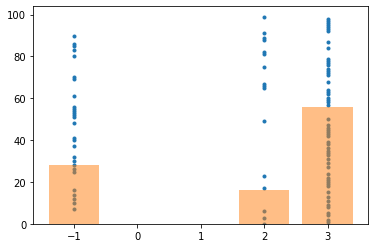

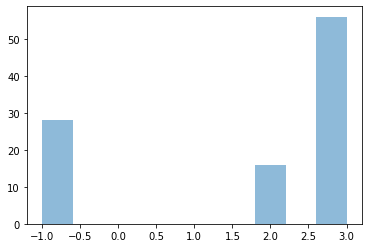

In [13]:
A = np.array([-1, 2,3])
P = np.array([0.3, 0.2, 0.5])
n = 100
R = np.array(np.arange(n))
X = np.array([random_variable_simple(A,P) for _ in R])
print(X)
plt.figure(0)
plt.scatter(X,R,marker='.');
labels, counts = np.unique(X, return_counts=True)
plt.bar(labels, counts, align='center', alpha=0.5)
plt.figure(1)
plt.hist(X, alpha=0.5); # Построение гистограммы сразу. Вместо использования np.unique и plt.bar

## Задание 1
Напишите код функции random_variable(A,P), которая генерирует случайную величину при заданных A и P любого размера. Т.е. надо модернизировать random_variable_simple, которая работает только при условии, что len(A) = len(P) = 3.

In [14]:
def random_variable(A,P):
    return 0

Запустите для проверки

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


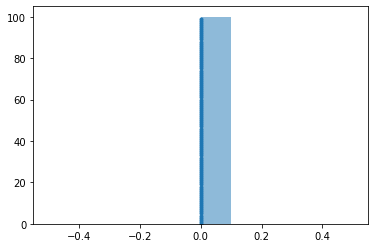

In [16]:
A = np.array([-2,-1,0,1,2])
P = np.array([0.1, 0.2, 0.2,0.1,0.4])
n = 100
X = np.array([random_variable(A,P) for _ in range(n)])
print(X)
plt.scatter(X,R,marker='.');
plt.hist(X, alpha=0.5);

В дальнейшем для генерации выборки можно использовать функцию np.random.choice

[ 1  1  2 -2  2 -1  0  0  2 -1 -2 -1  1  2 -1  0 -1 -1 -1  2  0  2  2  2
 -2 -1  2  0  0 -1 -1  1 -1 -1  2  0  2  0  2  2 -2  2  2  0  1  1  0 -2
  2  1 -1  2  0 -2  0  2  0 -2  2 -1  0  0  0  2  2  2  0  1 -2  1  2  2
 -2  0  2 -2  0  2  1  2  2 -1  0  0  1  2 -1  1  2  2  0  2  0 -2  2 -1
  2 -1  2 -2]


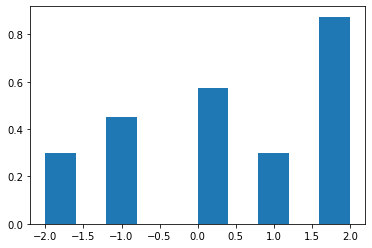

In [28]:
A = np.array([-2,-1,0,1,2])
P = np.array([0.1, 0.2, 0.2,0.1,0.4])
n = 100
X = np.random.choice(A, size=n, p=P)
print(X)
plt.hist(X, density=True);

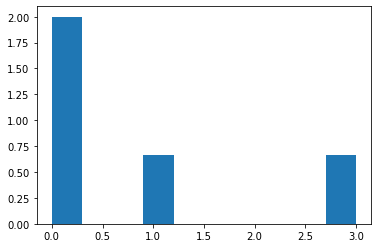

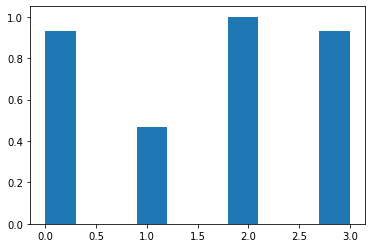

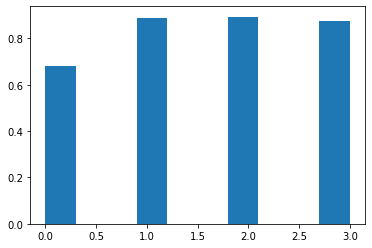

In [31]:
k = 4
A = range(k)
P = [1/k]*k
plt.figure()
plt.hist(np.random.choice(A, size=5, p=P), density=True);
plt.figure()
plt.hist(np.random.choice(A, size=50, p=P), density=True);
plt.figure()
plt.hist(np.random.choice(A, size=500, p=P), density=True);

## Задание 2

Пусть случайная величина $\xi$ принимает $k$ различных значения, заданных в массиве $A$, с некоторыми вероятностями $P$

При заданном $n$ рассмотрим выборку значений $x_1, \dots x_n$ значений случайной верличины $\xi$. На основе выборки построим гистограмму. Пусть $q_1(n), \dots ,q_k(n)$ - значения столбцов гистограммы.

Напиште код, который в зависмиости от значений $n=1, \dots, N$ строит графики значений $q_1(n), \dots ,q_k(n)$

Графики будут похожи на аналогичный пример с математическим ожиданием в конце тетрадки.

In [1]:
k = 2
A = range(k)
P = [1/k]*k
N = 1000

## Математическое ожидание
### В теории вероятности

Пусть дискретная случайная величина $\xi$ принимает значения $a_1, \dots, a_n$ с вероятнстями $p_1, \dots, p_n$.

Математическим ожиданием $\xi$  называется число:
$$
E(\xi) = p_1a_1 + p_2a_2 + \dots + p_na_n = \sum_{i=1}^n p_i \cdot a_i = 
\begin{pmatrix}
p_1 & p_2 & \dots & p_n
\end{pmatrix}
\begin{pmatrix}
a_1 \\ 
a_2 \\ 
\vdots \\
a_n
\end{pmatrix}
$$

### В статистике

Пусть $x_1, \dots x_n$  - выборка значений.

Средним значением называется число:
$$
\overline{x} = \frac{1}{n} \sum_{i=1}^nx_i
$$



## Задание 3
Напишите код функции expected_value(A,P), которая находит математическое ожидание случайной величины $\xi$, задаваемой $(A,P)$
Напишите код функции mean_value(X), которая находит среднее значение выборки $X$

In [6]:
def expected_value(A,P):
    return 0

def mean_value(X):
    return 0

Используя NumPy это можно сделать так:

In [7]:
print(A.dot(P))
print(X.mean())

0.5
0.0


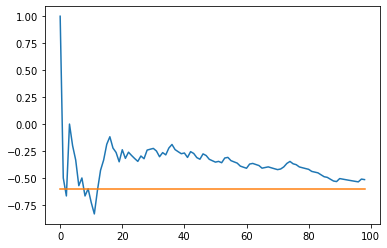

In [10]:
A = np.array([-2,-1,0,1,2])
P = np.array([0.2,0.5,0.1,0.1,0.1])
N = 100
X = np.random.choice(A, size=N, p=P)
Z = [X[:n].mean() for n in range(1,N)]
plt.plot(Z)
plt.plot([A.dot(P)]*(N-1));